## Formateo de Resultados

* Fecha: 2022-02-22
* Coder: Lenin G. Falconi
* Obtejivo: Formatear los resultados generados en el modelo 2022 de la EPN para su consumo por parte de procesos

In [2]:
import pandas as pd
import numpy as np
import os
dir_root = os.getcwd()
dir_root

'c:\\Users\\falconiel\\PycharmProjects\\EPN_Fiscales\\Proyecto_Fiscal-a'

Existen dos juegos de resultados localizados en Resultados/Modelo y Resultados/Predicciones


**Resultados Modelo*
Contienen dos hojas de Excel:
* Resumen: Contiene los valores a reportar en el déficit de fiscales. Posiblemente se tiene que corregir la cantidad de fiscales actuales porque seguro se estimo con los valores del distributivo de talento humano que estaban incorrectamente realizados
* Fiscalias: Contiene la distribución o asignación de Fiscales a Fiscalía

In [27]:
# os.listdir(os.path.join(dir_root, 'Resultados/Modelo/'))
os.listdir(os.path.join(dir_root, 'Resultados_Corregidos/Resultados_Final/'))

['Resultados_AZUAY.xlsx',
 'Resultados_BOLIVAR.xlsx',
 'Resultados_CARCHI.xlsx',
 'Resultados_CAÑAR.xlsx',
 'Resultados_CHIMBORAZO.xlsx',
 'Resultados_COTOPAXI.xlsx',
 'Resultados_EL ORO.xlsx',
 'Resultados_ESMERALDAS.xlsx',
 'Resultados_GALAPAGOS.xlsx',
 'Resultados_GUAYAS.xlsx',
 'Resultados_IMBABURA.xlsx',
 'Resultados_LOJA.xlsx',
 'Resultados_LOS RIOS.xlsx',
 'Resultados_MANABI.xlsx',
 'Resultados_MORONA SANTIAGO.xlsx',
 'Resultados_NAPO.xlsx',
 'Resultados_ORELLANA.xlsx',
 'Resultados_PASTAZA.xlsx',
 'Resultados_PICHINCHA.xlsx',
 'Resultados_SANTA ELENA.xlsx',
 'Resultados_SANTO DOMINGO DE LOS TSACHILAS.xlsx',
 'Resultados_SUCUMBIOS.xlsx',
 'Resultados_TUNGURAHUA.xlsx',
 'Resultados_ZAMORA CHINCHIPE.xlsx']

In [28]:
os.listdir(os.path.join(dir_root, 'Resultados/Prediccion/'))


['AZUAY.xlsx',
 'BOLIVAR.xlsx',
 'CARCHI.xlsx',
 'CAÑAR.xlsx',
 'CHIMBORAZO.xlsx',
 'COTOPAXI.xlsx',
 'EL ORO.xlsx',
 'ESMERALDAS.xlsx',
 'GALAPAGOS.xlsx',
 'GUAYAS.xlsx',
 'IMBABURA.xlsx',
 'LOJA.xlsx',
 'LOS RIOS.xlsx',
 'MANABI.xlsx',
 'MORONA SANTIAGO.xlsx',
 'NAPO.xlsx',
 'ORELLANA.xlsx',
 'PASTAZA.xlsx',
 'PICHINCHA.xlsx',
 'SANTA ELENA.xlsx',
 'SANTO DOMINGO DE LOS TSACHILAS.xlsx',
 'SUCUMBIOS.xlsx',
 'TUNGURAHUA.xlsx',
 'ZAMORA CHINCHIPE.xlsx']

## Generación de Tabla de Déficit de Fiscales por Cantón y por Provincia

Para la generación de estos resultados voy a generar una tabla maestra con los datos presentados en la ficha Resumen. Incrementaré el código de Cantón y adicional traeré la cantidad de fiscales leída del archivo que se considera correcto para realizar el cálculo de los déficit

In [29]:
from tqdm import tqdm
import re
regex = r"Resultados\_([\wÁÉÍÓÚ Ñ]+).xlsx"  
deficit_fiscales_dict = {}
# for arch in tqdm(os.listdir(os.path.join(dir_root, 'Resultados/Modelo/'))):
for arch in tqdm(os.listdir(os.path.join(dir_root, 'Resultados_Corregidos/Resultados_Final/'))):
    # file_path = os.path.join(dir_root, 'Resultados/Modelo/', arch)
    file_path = os.path.join(dir_root, 'Resultados_Corregidos/Resultados_Final/', arch)
    provincia_name = re.findall(regex, arch, re.MULTILINE)[0]
    provincia_df = pd.read_excel(file_path, sheet_name='Resumen')
    provincia_df['Provincia'] = provincia_name
    deficit_fiscales_dict[provincia_name] = provincia_df


100%|██████████| 24/24 [00:00<00:00, 38.31it/s]


In [30]:
deficit_fiscales_dict['CARCHI']

,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia
0,TULCAN,103533,2445,10,9,-1,9.658756,8.692881,9,-1,8.692881,CARCHI
1,MONTUFAR,34416,711,2,3,1,5.811251,8.716876,3,1,8.716876,CARCHI
2,BOLIVAR,15553,342,1,2,1,6.429628,12.859255,2,1,12.859255,CARCHI
3,ESPEJO,13775,329,1,2,1,7.259528,14.519056,2,1,14.519056,CARCHI
4,MIRA,11868,244,0,1,1,0.000000,8.426020,1,1,8.426020,CARCHI
5,SAN PEDRO DE HUACA,9022,151,0,1,1,0.000000,11.084017,1,1,11.084017,CARCHI


In [31]:
deficit_cantones = pd.concat([deficit_fiscales_dict[x] for x in deficit_fiscales_dict.keys()])
deficit_cantones.reset_index(inplace=True)
deficit_cantones.shape

(222, 13)

Se observa los Cantones que tendrán conflicto al momento de aplicar el diccionario para colocar los codigos de los mismos porque los nombres son repetidos

In [32]:
deficit_cantones[deficit_cantones.duplicated(subset="Cantones", keep=False)]

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia
24,2,BOLIVAR,15553,342,1,2,1,6.429628,12.859255,2,1,12.859255,CARCHI
121,13,OLMEDO,4038,80,0,4,4,0.000000,99.058940,4,4,99.058940,LOJA
157,20,OLMEDO,10124,207,0,1,1,0.000000,9.877519,1,1,9.877519,MANABI
158,21,BOLIVAR,45903,0,1,4,3,2.178507,8.714027,4,3,8.714027,MANABI


Por esta razon se realizan los siguientes cambios de nombres a fin de poder ubicar de manera univoca los cantones y sus códigos. La suerte es que Olmedo tiene 0 fiscales asignados en ambos casos.... pero Bolivar No

In [33]:
deficit_cantones.Cantones[(deficit_cantones.Provincia=="MANABI")&(deficit_cantones.Cantones=="BOLIVAR")] = "BOLIVAR (CALCETA)"
deficit_cantones.Cantones[(deficit_cantones.Provincia=="LOJA")&(deficit_cantones.Cantones=="OLMEDO")] = "OLMEDO (LOJA)"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_16540/3745159939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[(deficit_cantones.Provincia=="MANABI")&(deficit_cantones.Cantones=="BOLIVAR")] = "BOLIVAR (CALCETA)"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_16540/3745159939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[(deficit_cantones.Provincia=="LOJA")&(deficit_cantones.Cantones=="OLMEDO")] = "OLMEDO (LOJA)"


In [34]:
deficit_cantones[deficit_cantones.duplicated(subset="Cantones", keep=False)]

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia


## Extracción del Código de Canton
El diccionario de códigos de canton se obtiene por medio de sql con el siguiente código. No obstante este repo no tiene conexión a las librerías internas por lo que se consulta el archivo csv con la información directamente

    from snippets.utils import conectar_sql
    from sqlalchemy import text
    conn = conectar_sql()
    query = """
    SELECT 
    cantones.can_descripcion as CANTON,
    cantones.can_iso as CODIGO_CANTON
    FROM fiscalia.gen_canton AS cantones;
    """

    codigos_cantones = pd.read_sql(text(query), conn)
    codigos_cantones

In [35]:
codigos_cantones = pd.read_csv(os.path.join(dir_root, 'diccionario_codigoCantones.csv'),
                               converters={'CODIGO_CANTON':str})
codigos_cantones.sample(5)

,CANTON,CODIGO_CANTON
164,TENA,1501
54,ATAHUALPA,0703
71,ATACAMES,0806
142,SANTA ANA,1313
134,FLAVIO ALFARO,1305


In [36]:
codigos_cantones_dict = dict(zip(codigos_cantones.CANTON, codigos_cantones.CODIGO_CANTON))
list(codigos_cantones_dict.items())[:10]

[('CUENCA', '0101'),
 ('GIRON', '0102'),
 ('GUALACEO', '0103'),
 ('NABON', '0104'),
 ('PAUTE', '0105'),
 ('PUCARA', '0106'),
 ('SAN FERNANDO', '0107'),
 ('SANTA ISABEL', '0108'),
 ('SIGSIG', '0109'),
 ('OÑA', '0110')]

In [37]:
len(codigos_cantones_dict.keys())

221

Sustituyendo algunos cantones para que cuadren con las claves del diccionario

In [38]:
deficit_cantones.Cantones[deficit_cantones.Cantones=="ONA"] = "OÑA"
deficit_cantones.Cantones[deficit_cantones.Cantones=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
deficit_cantones.Cantones[deficit_cantones.Cantones=="ANTONIO ELIZALDE"] = "GENERAL ANTONIO ELIZALDE (BUCAY)"
deficit_cantones.Cantones[deficit_cantones.Cantones=="EMPALME"] = "EL EMPALME"
deficit_cantones.Cantones[deficit_cantones.Cantones=="MARCELINO MARIDUENA"] = "CORONEL MARCELINO MARIDUENA"
deficit_cantones.Cantones[deficit_cantones.Cantones=="BUENA FE"] = "SAN JACINTO DE BUENA FE"
deficit_cantones.Cantones[deficit_cantones.Cantones=="SANTIAGO (MENDEZ) DE PILLARO"] = "SANTIAGO DE PILLARO"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_16540/4077159468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[deficit_cantones.Cantones=="ONA"] = "OÑA"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_16540/4077159468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.Cantones[deficit_cantones.Cantones=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_16540/4077159468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [39]:
deficit_cantones['CODCANTON'] = deficit_cantones.Cantones.apply(lambda x: codigos_cantones_dict[x] if x in codigos_cantones_dict.keys() else 'NO ENCUENTRO')
deficit_cantones.sample(10)

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON
17,2,ECHANDíA,14318,427,1,2,1,6.984216,13.968431,2,1,13.968431,BOLIVAR,0204
132,8,BABA,43698,660,0,3,3,0.000000,6.865303,4,4,9.153737,LOS RIOS,1202
149,12,TOSAGUA,42567,504,1,2,1,2.349238,4.698475,4,3,9.396951,MANABI,1315
44,9,PENIPE,6908,179,1,1,0,14.475970,14.475970,1,0,14.475970,CHIMBORAZO,0609
42,7,CHUNCHI,12644,301,1,1,0,7.908890,7.908890,2,1,15.817779,CHIMBORAZO,0605
215,2,EL PANGUI,11300,466,1,2,1,8.849558,17.699115,2,1,17.699115,ZAMORA CHINCHIPE,1906
6,6,GIRON,12949,358,1,2,1,7.722604,15.445208,2,1,15.445208,AZUAY,0102
77,1,DURAN,331284,6572,7,24,17,2.112991,7.244539,27,20,8.150107,GUAYAS,0907
55,3,HUAQUILLAS,62479,1559,5,7,2,8.002689,11.203764,7,2,11.203764,EL ORO,0707
86,10,NARANJITO,44817,922,0,3,3,0.000000,6.693888,4,4,8.925185,GUAYAS,0912


Buscando posibles errores bajo clave 'NO ENCUENTRO'

In [40]:
deficit_cantones[deficit_cantones.Cantones.str.contains("SANTIAGO")]

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON
163,4,SANTIAGO (MENDEZ),11285,299,0,1,1,0.000000,8.861320,1,1,8.861320,MORONA SANTIAGO,1405
212,8,SANTIAGO DE PILLARO,43987,0,1,5,4,2.273399,11.366995,5,4,11.366995,TUNGURAHUA,1808


In [46]:
deficit_cantones[deficit_cantones.Cantones.str.contains("GOLONDRINAS")]

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON
107,6,LAS GOLONDRINAS,8063,0,0,1,1,0.0,12.402332,1,1,12.402332,IMBABURA,NO ENCUENTRO


In [49]:
deficit_cantones.Cantones[deficit_cantones.CODCANTON=='NO ENCUENTRO'].tolist()

[]

In [48]:
deficit_cantones.CODCANTON[deficit_cantones.Cantones=="LAS GOLONDRINAS"] = "0001"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_16540/656627019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones.CODCANTON[deficit_cantones.Cantones=="LAS GOLONDRINAS"] = "0001"


## Corrección de la cantidad de Fiscales de acuedo al Reporte de la CJ

In [50]:
cantidad_fiscales = pd.read_excel(os.path.join(dir_root, 'cantidadFiscalesCantonJudicatura.xlsx'),
                                  converters={'CODCANTON':str})
cantidad_fiscales.shape

(139, 4)

In [51]:
cantidad_fiscales.sample(5)

,PROVINCIA,CANTON,CODCANTON,CANTIDAD_FISCALES_ACTUAL
55,GUAYAS,GUAYAQUIL,0901,141
7,BOLIVAR,ECHANDíA,0204,1
23,CHIMBORAZO,CUMANDA,0610,1
110,ORELLANA,PUERTO FRANCISCO DE ORELLANA,2201,7
104,MORONA SANTIAGO,SUCUA,1406,1


In [52]:
cantidad_fiscales.CANTIDAD_FISCALES_ACTUAL.sum()

845

In [53]:
deficit_cantones['Fiscales Actuales'].sum()

845

In [54]:
deficit_cantones_tmp = pd.merge(deficit_cantones, cantidad_fiscales, on='CODCANTON', how='left')
print(deficit_cantones.shape)
print(deficit_cantones_tmp.shape)

(222, 14)
(222, 17)


In [55]:
deficit_cantones_tmp.CANTIDAD_FISCALES_ACTUAL.sum()

845.0

In [56]:
deficit_cantones_tmp.sample(10)

,index,Cantones,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON,PROVINCIA,CANTON,CANTIDAD_FISCALES_ACTUAL
123,15,SOZORANGA,6947,65,0,0,0,0.000000,0.000000,0,0,0.000000,LOJA,1112,NaN,NaN,NaN
34,6,SUSCAL,6776,130,0,1,1,0.000000,14.757969,1,1,14.757969,CAÑAR,0307,NaN,NaN,NaN
154,17,PUERTO LOPEZ,25317,318,0,2,2,0.000000,7.899830,3,3,11.849745,MANABI,1319,NaN,NaN,NaN
79,3,DAULE,185114,2909,0,10,10,0.000000,5.402077,15,15,8.103115,GUAYAS,0906,NaN,NaN,NaN
29,1,LA TRONCAL,81353,2609,5,9,4,6.146055,11.062899,9,4,11.062899,CAÑAR,0304,CAÑAR,LA TRONCAL,5.0
182,2,ARAJUNO,8399,192,0,1,1,0.000000,11.906179,1,1,11.906179,PASTAZA,1604,NaN,NaN,NaN
42,7,CHUNCHI,12644,301,1,1,0,7.908890,7.908890,2,1,15.817779,CHIMBORAZO,0605,CHIMBORAZO,CHUNCHI,1.0
99,23,EL EMPALME,87589,0,3,12,9,3.425088,13.700351,12,9,13.700351,GUAYAS,0908,GUAYAS,EL EMPALME,3.0
155,18,JUNIN,18532,331,1,2,1,5.396072,10.792143,2,1,10.792143,MANABI,1307,MANABÍ,JUNIN,1.0
15,0,GUARANDA,111010,2036,8,9,1,7.206558,8.107378,9,1,8.107378,BOLIVAR,0201,BOLIVAR,GUARANDA,8.0


In [57]:
# deficit_cantones_tmp.rename(columns={'CEDULA':'FISCALES_ACTUALES'}, inplace=True)
deficit_cantones_tmp.drop(columns=['Fiscales Actuales', 'PROVINCIA', 'CANTON'], inplace=True)
deficit_cantones_tmp.CANTIDAD_FISCALES_ACTUAL.fillna(0, inplace=True)
deficit_cantones_tmp.sample(5)

,index,Cantones,Poblacion,Delitos,Fiscales x Carga,Déficit x Carga,Tasa Actual,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Provincia,CODCANTON,CANTIDAD_FISCALES_ACTUAL
176,0,PUERTO FRANCISCO DE ORELLANA,97326,2960,12,5,7.192323,13.357171,12,5,13.357171,ORELLANA,2201,7.0
161,2,GUALAQUIZA,19716,431,2,2,0.000000,10.144045,2,2,10.144045,MORONA SANTIAGO,1402,0.0
120,12,PINDAL,10822,126,0,0,0.000000,0.000000,0,0,0.000000,LOJA,1114,0.0
128,4,VALENCIA,56837,1030,4,3,1.759417,7.037669,5,4,8.797086,LOS RIOS,1211,1.0
9,9,CHORDELEG,15564,197,1,1,0.000000,6.425084,2,2,12.850167,AZUAY,0111,0.0


In [58]:
deficit_cantones_tmp.CANTIDAD_FISCALES_ACTUAL.sum()

845.0

Reordenando las columnas

**Nota** dado que se realiza la corrección de la cantidad de fiscales por cantón no es necesario ya realizar el merge con la tabla de las cantidades de fiscales por esta razón no usare deficit_cantones_tmp sino directamente deficit_cantones. Debe observarse que se ha incrementado un cantón LAS GOLONDRINAS en los resultados de la EPN

In [61]:
# deficit_cantones_df = deficit_cantones_tmp.copy() # Lo retiro porque la suma de la EPN es correcta
deficit_cantones_df = deficit_cantones.copy()
deficit_cantones_df = deficit_cantones_df.loc[:,['index', 
                                                 'CODCANTON', 
                                                 'Provincia', 
                                                 'Cantones', 
                                                 'Poblacion', 
                                                 'Delitos', 
                                                #  'CANTIDAD_FISCALES_ACTUAL', # Nombre resultado del merge
                                                 'Fiscales Actuales',
                                                 'Tasa Actual',
                                                 'Fiscales x Carga', 
                                                 'Déficit x Carga', 
                                                 'Tasa x Carga', 
                                                 'Fiscales x Población',
                                                 'Déficit x Población', 
                                                 'Tasa x Población']]
deficit_cantones_df.sample(10)

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
154,17,1319,MANABI,PUERTO LOPEZ,25317,318,0,0.000000,2,2,7.899830,3,3,11.849745
183,3,1603,PASTAZA,SANTA CLARA,4225,161,0,0.000000,1,1,23.668639,1,1,23.668639
217,4,1907,ZAMORA CHINCHIPE,CENTINELA DEL CONDOR,8602,283,1,11.625203,1,0,11.625203,1,0,11.625203
87,11,0904,GUAYAS,BALZAR,60887,945,1,1.642387,3,2,4.927160,5,4,8.211934
117,9,1113,LOJA,ZAPOTILLO,14571,246,1,6.862947,1,0,6.862947,2,1,13.725894
140,3,1303,MANABI,CHONE,130124,1954,4,3.073991,7,3,5.379484,11,7,8.453475
212,8,1808,TUNGURAHUA,SANTIAGO DE PILLARO,43987,0,1,2.273399,5,4,11.366995,5,4,11.366995
173,2,1507,NAPO,QUIJOS,6894,375,1,14.505367,2,1,29.010734,2,1,29.010734
111,3,1108,LOJA,MACARA,20242,384,1,4.940223,2,1,9.880447,2,1,9.880447
43,8,0604,CHIMBORAZO,CHAMBO,13530,245,0,0.000000,1,1,7.390983,2,2,14.781966


In [62]:
deficit_cantones_df[deficit_cantones_df.Provincia=="LOJA"]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
108,0,1101,LOJA,LOJA,284224,11899,16,5.629363,43,27,15.128912,43,27,15.128912
109,1,1103,LOJA,CATAMAYO,36646,777,2,5.457622,3,1,8.186432,3,1,8.186432
110,2,1102,LOJA,CALVAS,29430,410,1,3.397893,2,1,6.795787,3,2,10.193680
111,3,1108,LOJA,MACARA,20242,384,1,4.940223,2,1,9.880447,2,1,9.880447
112,4,1111,LOJA,SARAGURO,33748,403,1,2.963139,8,7,23.705108,8,7,23.705108
113,5,1109,LOJA,PALTAS,23065,362,1,4.335573,2,1,8.671147,2,1,8.671147
114,6,1107,LOJA,GONZANAMA,10465,245,1,9.555662,1,0,9.555662,1,0,9.555662
115,7,1104,LOJA,CELICA,16298,241,1,6.135722,1,0,6.135722,2,1,12.271444
116,8,1110,LOJA,PUYANGO,15781,214,0,0.000000,1,1,6.336734,2,2,12.673468
117,9,1113,LOJA,ZAPOTILLO,14571,246,1,6.862947,1,0,6.862947,2,1,13.725894


In [63]:
deficit_cantones_df[deficit_cantones_df.Provincia=="SANTA ELENA"]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
192,0,2402,SANTA ELENA,LA LIBERTAD,121372,2659,6,4.943480,12,6,9.886959,12,6,9.886959
193,1,2401,SANTA ELENA,SANTA ELENA,197273,2984,6,3.041470,10,4,5.069117,16,10,8.110588
194,2,2403,SANTA ELENA,SALINAS,99853,2273,3,3.004416,9,6,9.013249,9,6,9.013249


## Recálculo de los Valores de Déficit

Debido al problema presentado con respecto a la cantidad de fiscales por canton, se debe recalcular los valores de *deficit x carga*, *deficit x poblacion*, *tasa_actual* 
Debido a errores que existen en los resultados proveídos en cuanto al símbolo usado para decimales ${,|.}$, procedo a recalcular las tasas en todos los resultados a fin de evitar estos errores

Si los errores ya fueron corregidos deberíamos obtener resultados $\approx 0$ Por tanto voy a calcular la diferencia entre los resultados y revisar si existen valores que no encajen


In [69]:
# Activar para realizar el recálculo de valores
# deficit_cantones_df['Tasa Actual'] = deficit_cantones_df.CANTIDAD_FISCALES_ACTUAL / deficit_cantones_df.Poblacion*1e5
# deficit_cantones_df['Déficit x Carga'] = deficit_cantones_df['Fiscales x Carga'] - deficit_cantones_df['CANTIDAD_FISCALES_ACTUAL']
# deficit_cantones_df['Déficit x Población'] = deficit_cantones_df['Fiscales x Población'] - deficit_cantones_df['CANTIDAD_FISCALES_ACTUAL']
# # recalculo de tasas para mitigar errores
# deficit_cantones_df['Tasa x Carga'] = deficit_cantones_df['Fiscales x Carga'] / deficit_cantones_df.Poblacion*1e5
# deficit_cantones_df['Tasa x Población'] = deficit_cantones_df['Fiscales x Población'] / deficit_cantones_df.Poblacion*1e5
# deficit_cantones_df.sample(10)

# Cálculo de Verificación
deficit_cantones_df['Tasa Actual Check'] = deficit_cantones_df['Fiscales Actuales'] / deficit_cantones_df.Poblacion*1e5 - deficit_cantones_df['Tasa Actual']
deficit_cantones_df['Déficit x Carga Check'] = deficit_cantones_df['Fiscales x Carga'] - deficit_cantones_df['Fiscales Actuales'] - deficit_cantones_df['Déficit x Carga']
deficit_cantones_df['Déficit x Población Check'] = deficit_cantones_df['Fiscales x Población'] - deficit_cantones_df['Fiscales Actuales'] - deficit_cantones_df['Déficit x Población']
# recalculo de tasas para mitigar errores
deficit_cantones_df['Tasa x Carga Check'] = deficit_cantones_df['Fiscales x Carga'] / deficit_cantones_df.Poblacion*1e5 #- deficit_cantones_df['Tasa x Carga']
deficit_cantones_df['Tasa x Población Check'] = deficit_cantones_df['Fiscales x Población'] / deficit_cantones_df.Poblacion*1e5 #- deficit_cantones_df['Tasa x Población']
deficit_cantones_df.sample(10)


,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Tasa Actual Check,Déficit x Carga Check,Déficit x Población Check,Tasa x Carga Check,Tasa x Población Check
10,10,0107,AZUAY,SAN FERNANDO,4130,86,0,0.000000,0,0,0.000000,0,0,0.000000,0.0,0,0,0.000000,0.000000
131,7,1203,LOS RIOS,MONTALVO,29400,558,0,0.000000,2,2,6.802721,3,3,10.204082,0.0,0,0,6.802721,10.204082
65,13,0705,EL ORO,CHILLA,2326,53,0,0.000000,0,0,0.000000,0,0,0.000000,0.0,0,0,0.000000,0.000000
146,9,1312,MANABI,ROCAFUERTE,37634,626,1,2.657172,2,1,5.314343,4,3,10.628687,0.0,0,0,5.314343,10.628687
177,1,2203,ORELLANA,LA JOYA DE LOS SACHAS,39111,1086,1,2.556825,4,3,10.227302,4,3,10.227302,0.0,0,0,10.227302,10.227302
175,4,1509,NAPO,CARLOS JULIO AROSEMENA TOLA,4590,201,0,0.000000,1,1,21.786492,1,1,21.786492,0.0,0,0,21.786492,21.786492
72,6,0807,ESMERALDAS,RIO VERDE,32060,467,0,0.000000,2,2,6.238303,3,3,9.357455,0.0,0,0,6.238303,9.357455
172,1,1503,NAPO,ARCHIDONA,34602,719,2,5.780013,3,1,8.670019,3,1,8.670019,0.0,0,0,8.670019,8.670019
7,7,0104,AZUAY,NABON,17361,278,1,5.760037,1,0,5.760037,2,1,11.520074,0.0,0,0,5.760037,11.520074
154,17,1319,MANABI,PUERTO LOPEZ,25317,318,0,0.000000,2,2,7.899830,3,3,11.849745,0.0,0,0,7.899830,11.849745


In [70]:
deficit_cantones_df[(deficit_cantones_df['Déficit x Carga Check']!=0)|
                    (deficit_cantones_df['Déficit x Población Check']!=0)]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población,Tasa Actual Check,Déficit x Carga Check,Déficit x Población Check,Tasa x Carga Check,Tasa x Población Check
213,0,1901,ZAMORA CHINCHIPE,ZAMORA,33913,911,6,17.69233,3,-3,8.846165,6,-3,8.846165,3.552714e-15,0,3,8.846165,17.69233


In [162]:
deficit_cantones_df.CANTIDAD_FISCALES_ACTUAL.sum()

845.0

In [163]:
deficit_cantones_df[deficit_cantones_df.Provincia=="ESMERALDAS"]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,CANTIDAD_FISCALES_ACTUAL,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
66,0,0801,ESMERALDAS,ESMERALDAS,224713,6212,18.0,8.010217,23,5.0,10.235278,23,5.0,10.235278
67,1,0804,ESMERALDAS,QUININDE,149872,2074,3.0,2.001708,7,4.0,4.670652,12,9.0,8.006832
68,2,0806,ESMERALDAS,ATACAMES,57014,1660,2.0,3.507910,6,4.0,10.523731,6,4.0,10.523731
69,3,0805,ESMERALDAS,SAN LORENZO,64490,1146,0.0,0.000000,4,4.0,6.202512,6,6.0,9.303768
70,4,0802,ESMERALDAS,ELOY ALFARO,46878,597,2.0,4.266394,2,0.0,4.266394,4,2.0,8.532787
71,5,0803,ESMERALDAS,MUISNE,31957,661,1.0,3.129205,3,2.0,9.387615,3,2.0,9.387615
72,6,0807,ESMERALDAS,RIO VERDE,32336,467,0.0,0.000000,2,2.0,6.185057,3,3.0,9.277585
73,7,2302,ESMERALDAS,LA CONCORDIA,54010,0,2.0,3.703018,5,3.0,9.257545,5,3.0,9.257545


In [164]:
deficit_cantones_df.rename(columns={'CANTIDAD_FISCALES_ACTUAL':'Fiscales Actuales'}, inplace=True)

In [165]:
deficit_cantones_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,221.0,5.909502,5.324980,0.0,2.000000,5.000000,8.000000,2.400000e+01
Poblacion,221.0,81205.054299,275448.661030,2444.0,13394.000000,29217.000000,64152.000000,2.857775e+06
Delitos,221.0,1635.176471,5370.988043,0.0,246.000000,465.000000,1032.000000,5.482600e+04
Fiscales Actuales,221.0,3.823529,15.848160,0.0,0.000000,1.000000,2.000000,1.780000e+02
Tasa Actual,221.0,3.274581,3.740827,0.0,0.000000,2.440364,5.547235,2.620888e+01
Fiscales x Carga,221.0,6.289593,17.668856,0.0,1.000000,2.000000,5.000000,1.780000e+02
Déficit x Carga,221.0,2.466063,3.938733,-4.0,1.000000,1.000000,3.000000,3.700000e+01
Tasa x Carga,221.0,9.917863,8.250689,0.0,6.150818,8.132065,11.553348,6.633939e+01
Fiscales x Población,221.0,7.416290,22.247135,0.0,2.000000,3.000000,6.000000,2.290000e+02
Déficit x Población,221.0,3.592760,7.155846,-3.0,1.000000,2.000000,4.000000,8.300000e+01


In [166]:
deficit_cantones_df[(deficit_cantones_df['Tasa x Carga']==max(deficit_cantones_df['Tasa x Carga']))|
                    (deficit_cantones_df['Tasa x Población']==max(deficit_cantones_df['Tasa x Población']))|
                    (deficit_cantones_df['Tasa Actual'] == max(deficit_cantones_df['Tasa Actual']))]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
21,6,0207,BOLIVAR,LAS NAVES,7631,255,2.0,26.208885,1,-1.0,13.104442,1,-1.0,13.104442
210,7,1804,TUNGURAHUA,MOCHA,7537,153,0.0,0.000000,5,5.0,66.339392,5,5.0,66.339392


## Ajustando Zonas No delimitadas
Procedo a realizar el ajuste de zonas No delimitadas de acuerdo a

* Manga del cura @ Manabi
* El piedrero @ Guayas
* La Concordia de Esmeraldas a Santo Domingo
* Las golondrinas @ Imbabura

La información proporcionada por la Politécnica No esta considerando las Zonas no Delimitadas....

In [167]:
deficit_cantones_df[deficit_cantones_df.Cantones.str.contains("PIEDRERO|MANGA|GOLOND|CONCORDIA")]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
73,7,2302,ESMERALDAS,LA CONCORDIA,54010,0,2.0,3.703018,5,3.0,9.257545,5,3.0,9.257545


In [168]:
# deficit_cantones_df.Provincia[(deficit_cantones_df.Cantones=="LAS GOLONDRINAS")&(deficit_cantones_df.Provincia=="ZONA NO DELIMITADA")] = "IMBABURA"
# deficit_cantones_df.Provincia[(deficit_cantones_df.Cantones=="MANGA DEL CURA")&(deficit_cantones_df.Provincia=="ZONA NO DELIMITADA")] = "MANABI"
# deficit_cantones_df.Provincia[(deficit_cantones_df.Cantones=="EL PIEDRERO")&(deficit_cantones_df.Provincia=="ZONA NO DELIMITADA")] = "GUAYAS"
deficit_cantones_df.Provincia[(deficit_cantones_df.Cantones=="LA CONCORDIA")&(deficit_cantones_df.Provincia=="ESMERALDAS")] = "SANTO DOMINGO"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_36768/2508113651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones_df.Provincia[(deficit_cantones_df.Cantones=="LA CONCORDIA")&(deficit_cantones_df.Provincia=="ESMERALDAS")] = "SANTO DOMINGO"


In [169]:
deficit_cantones_df[deficit_cantones_df.Provincia.str.contains("DOMINGO")]

,index,CODCANTON,Provincia,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
73,7,2302,SANTO DOMINGO,LA CONCORDIA,54010,0,2.0,3.703018,5,3.0,9.257545,5,3.0,9.257545
195,0,2301,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,471132,10391,29.0,6.155387,37,8.0,7.853425,38,9.0,8.065680


In [170]:
deficit_cantones_df.Provincia[deficit_cantones.Provincia=="SANTO DOMINGO DE LOS TSACHILAS"] = "SANTO DOMINGO"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_36768/1655633778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deficit_cantones_df.Provincia[deficit_cantones.Provincia=="SANTO DOMINGO DE LOS TSACHILAS"] = "SANTO DOMINGO"


In [171]:
deficit_cantones_df.groupby('Provincia')['Cantones'].count()

Provincia
AZUAY               15
BOLIVAR              7
CARCHI               6
CAÑAR                7
CHIMBORAZO          10
COTOPAXI             7
EL ORO              14
ESMERALDAS           7
GALAPAGOS            3
GUAYAS              25
IMBABURA             6
LOJA                16
LOS RIOS            13
MANABI              22
MORONA SANTIAGO     12
NAPO                 5
ORELLANA             4
PASTAZA              4
PICHINCHA            8
SANTA ELENA          3
SANTO DOMINGO        2
SUCUMBIOS            7
TUNGURAHUA           9
ZAMORA CHINCHIPE     9
Name: Cantones, dtype: int64

Guardando los resultados de deficit de fiscales por canton

In [172]:
deficit_cantones_df.to_excel(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'deficitFiscalesCantonEPN2022_M2.xlsx'))

## Cálculo de Provincias

Se realiza el resumen de la información para Provincias

In [173]:
deficit_cantones.columns

Index(['index', 'Cantones', 'Poblacion', 'Delitos', 'Fiscales Actuales',
       'Fiscales x Carga', 'Déficit x Carga', 'Tasa Actual', 'Tasa x Carga',
       'Fiscales x Población', 'Déficit x Población', 'Tasa x Población',
       'Provincia', 'CODCANTON'],
      dtype='object')

In [174]:
deficit_provincias = deficit_cantones_df.groupby(['Provincia'])[['Poblacion','Delitos','Fiscales Actuales', 'Fiscales x Carga', 'Déficit x Carga', 'Fiscales x Población', 'Déficit x Población']].sum().reset_index()
deficit_provincias["Tasa x Carga"] = deficit_provincias['Fiscales x Carga'] / deficit_provincias.Poblacion*1e5
deficit_provincias["Tasa x Poblacion"] = deficit_provincias['Fiscales x Población'] / deficit_provincias.Poblacion*1e5
deficit_provincias



,Provincia,Poblacion,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Fiscales x Población,Déficit x Población,Tasa x Carga,Tasa x Poblacion
0,AZUAY,905519,15822,45.0,59,14.0,78,33.0,6.515600,8.613845
1,BOLIVAR,215679,4405,14.0,21,7.0,21,7.0,9.736692,9.736692
2,CARCHI,191984,4222,14.0,18,4.0,18,4.0,9.375781,9.375781
3,CAÑAR,289098,6844,20.0,25,5.0,29,9.0,8.647587,10.031200
4,CHIMBORAZO,538345,9797,27.0,38,11.0,49,22.0,7.058671,9.101970
5,COTOPAXI,502092,7568,22.0,36,14.0,44,22.0,7.170001,8.763334
6,EL ORO,735341,20068,46.0,85,39.0,80,34.0,11.559263,10.879306
7,ESMERALDAS,607260,12817,26.0,47,21.0,57,31.0,7.739683,9.386424
8,GALAPAGOS,33946,1231,2.0,6,4.0,6,4.0,17.675131,17.675131
9,GUAYAS,4507515,86890,172.0,305,133.0,375,203.0,6.766478,8.319440


In [175]:
deficit_provincias['Fiscales Actuales'].sum()

845.0

In [176]:
deficit_provincias.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Poblacion,24.0,747763.208333,1.049256e+06,33946.000000,199030.250000,495691.000000,639280.250000,4.507515e+06
Delitos,24.0,15057.250000,1.988423e+04,1231.000000,4628.500000,8529.000000,15835.000000,8.689000e+04
Fiscales Actuales,24.0,35.208333,4.725875e+01,2.000000,12.500000,23.500000,32.000000,1.940000e+02
Fiscales x Carga,24.0,57.916667,6.895047e+01,6.000000,20.500000,35.500000,61.500000,3.050000e+02
Déficit x Carga,24.0,22.708333,2.850855e+01,1.000000,8.500000,14.000000,21.500000,1.330000e+02
Fiscales x Población,24.0,68.291667,8.644952e+01,6.000000,20.750000,43.500000,74.250000,3.750000e+02
Déficit x Población,24.0,33.083333,4.371242e+01,1.000000,9.000000,19.500000,33.250000,2.030000e+02
Tasa x Carga,24.0,9.527020,2.829983e+00,6.515600,7.165806,8.758894,11.486893,1.767513e+01
Tasa x Poblacion,24.0,10.444105,2.346962e+00,8.188261,8.756216,9.561558,11.399473,1.767513e+01


In [177]:
deficit_provincias.columns

Index(['Provincia', 'Poblacion', 'Delitos', 'Fiscales Actuales',
       'Fiscales x Carga', 'Déficit x Carga', 'Fiscales x Población',
       'Déficit x Población', 'Tasa x Carga', 'Tasa x Poblacion'],
      dtype='object')

In [178]:
deficit_provincias = deficit_provincias.loc[:,['Provincia', 'Poblacion', 'Delitos', 'Fiscales Actuales', 'Fiscales x Carga', 'Déficit x Carga', 'Tasa x Carga', 'Fiscales x Población', 'Déficit x Población', 'Tasa x Poblacion']]
deficit_provincias.rename(columns={'Poblacion':'Población', 'Tasa x Poblacion':'Tasa x Población'}, inplace=True)
deficit_provincias

,Provincia,Población,Delitos,Fiscales Actuales,Fiscales x Carga,Déficit x Carga,Tasa x Carga,Fiscales x Población,Déficit x Población,Tasa x Población
0,AZUAY,905519,15822,45.0,59,14.0,6.515600,78,33.0,8.613845
1,BOLIVAR,215679,4405,14.0,21,7.0,9.736692,21,7.0,9.736692
2,CARCHI,191984,4222,14.0,18,4.0,9.375781,18,4.0,9.375781
3,CAÑAR,289098,6844,20.0,25,5.0,8.647587,29,9.0,10.031200
4,CHIMBORAZO,538345,9797,27.0,38,11.0,7.058671,49,22.0,9.101970
5,COTOPAXI,502092,7568,22.0,36,14.0,7.170001,44,22.0,8.763334
6,EL ORO,735341,20068,46.0,85,39.0,11.559263,80,34.0,10.879306
7,ESMERALDAS,607260,12817,26.0,47,21.0,7.739683,57,31.0,9.386424
8,GALAPAGOS,33946,1231,2.0,6,4.0,17.675131,6,4.0,17.675131
9,GUAYAS,4507515,86890,172.0,305,133.0,6.766478,375,203.0,8.319440


La cantidad Faltante de Fiscales a Nivel Nacional sería

In [179]:
print('Por poblacion: {}'.format(deficit_provincias['Fiscales x Población'].sum()))
print('Por carga: {}'.format(deficit_provincias['Fiscales x Carga'].sum()))

Por poblacion: 1639
Por carga: 1390


In [180]:
deficit_provincias.to_excel(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'deficitFiscalesProvinciaEPN2022M2.xlsx'))

## Graficando Resultados
Se realiza un gráfico descriptivo de barras por provincia y uno relacional

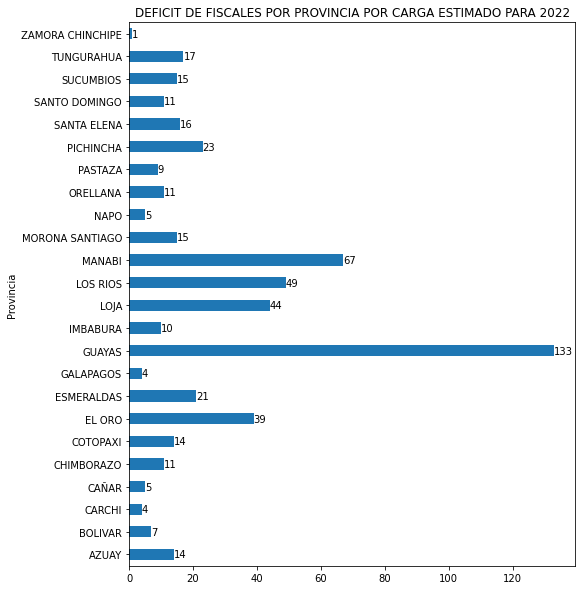

In [181]:
import matplotlib.pyplot as plt
plt.figure()
ax = deficit_provincias.groupby(['Provincia'])['Déficit x Carga'].sum().plot.barh(title='DEFICIT DE FISCALES POR PROVINCIA POR CARGA ESTIMADO PARA 2022', figsize=(8,10))
for contain in ax.containers:
    ax.bar_label(contain)
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\",
                         'provinciasDeficitXCarga2022.png'))

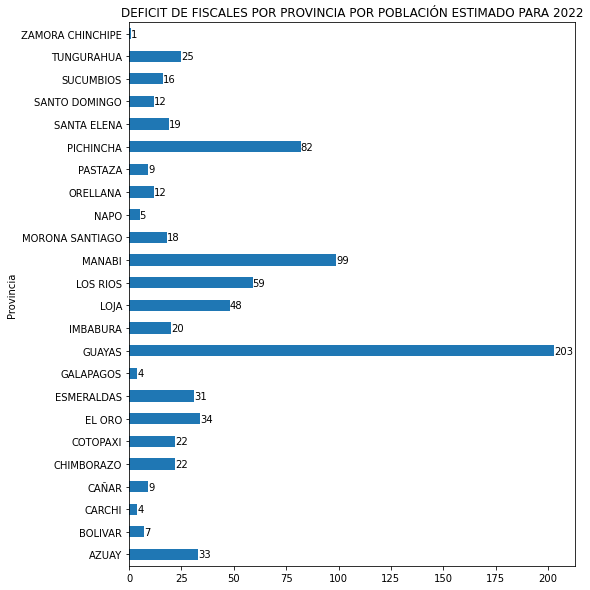

In [182]:
plt.figure()
ax = deficit_provincias.groupby(['Provincia'])['Déficit x Población'].sum().plot.barh(title='DEFICIT DE FISCALES POR PROVINCIA POR POBLACIÓN ESTIMADO PARA 2022', figsize=(8,10))
for contain in ax.containers:
    ax.bar_label(contain)
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\",
                         'provinciasDeficitXPoblacion2022.png'))

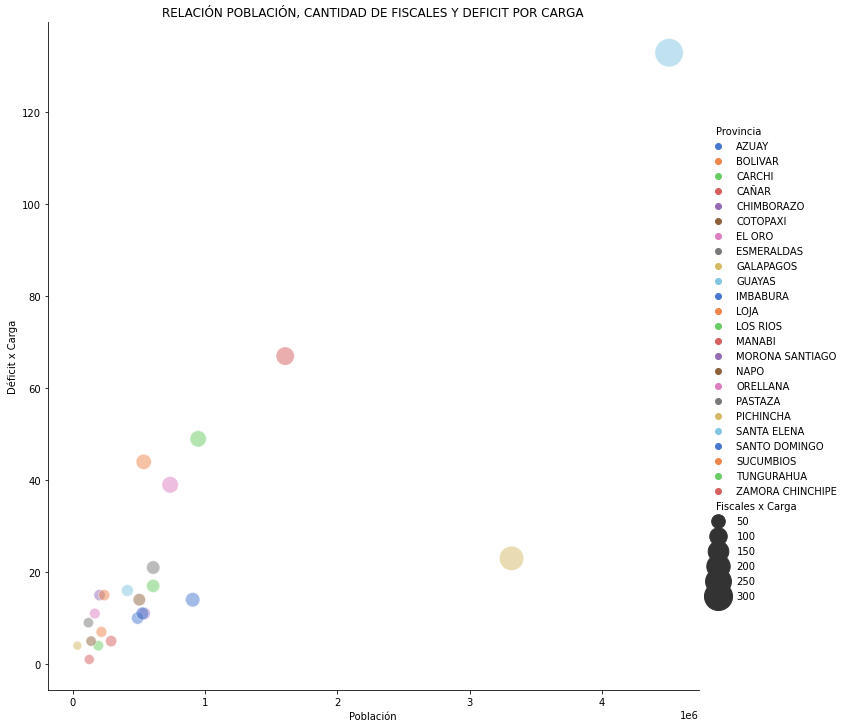

In [183]:
import seaborn as sns
sns.relplot(x='Población', y="Déficit x Carga", size='Fiscales x Carga', data=deficit_provincias, sizes=(80,800), alpha=.5, palette="muted", height=10, hue="Provincia").set(title="RELACIÓN POBLACIÓN, CANTIDAD DE FISCALES Y DEFICIT POR CARGA")
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'relacionCantonesDeficit_Carga.png'))

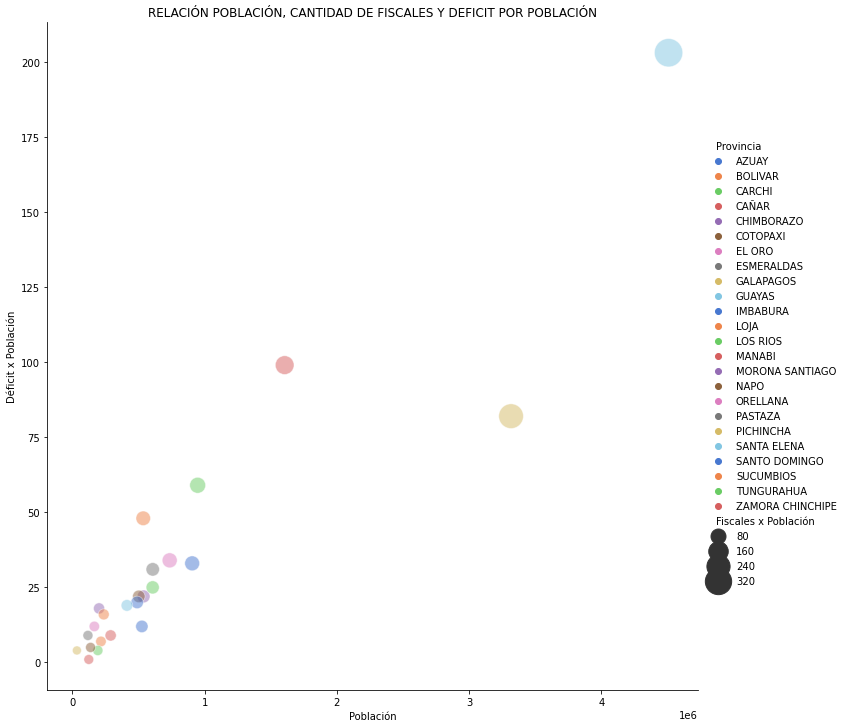

In [184]:
import seaborn as sns
sns.relplot(x='Población', y="Déficit x Población", size='Fiscales x Población', data=deficit_provincias, sizes=(80,800), alpha=.5, palette="muted", height=10, hue="Provincia").set(title="RELACIÓN POBLACIÓN, CANTIDAD DE FISCALES Y DEFICIT POR POBLACIÓN")
plt.savefig(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'relacionCantonesDeficit_Poblacion.png'))

## Asiganción de Fiscales
En esta sección del código se trata de obtener tablas con un formato adecuado para describir la asignación de fiscales

In [185]:
from tqdm import tqdm
import re
regex = r"Resultados\_([\wÁÉÍÓÚ Ñ]+).xlsx"  
asignacion_fiscales_dict = {}
for arch in tqdm(os.listdir(os.path.join(dir_root, 'Resultados/Modelo/'))):
    file_path = os.path.join(dir_root, 'Resultados/Modelo/', arch)
    provincia_name = re.findall(regex, arch, re.MULTILINE)[0]
    provincia_df = pd.read_excel(file_path, sheet_name='Fiscalias')
    provincia_df = provincia_df.transpose()
    provincia_df.columns = provincia_df.iloc[0]
    provincia_df = provincia_df[1:].reset_index()
    provincia_df.drop(columns=['Déficit x Carga', 'Faltantes x Población'], inplace=True)
    # Coloco un nombre distinto porque voy a usar el diccionario para poner codigos y generar una tabla maestra con la información y la asignación
    provincia_df.rename(columns={'index':'CANTON_NOMBRE'}, inplace=True)
    # provincia_df.index.name="ID"
    provincia_df['Provincia'] = provincia_name
    asignacion_fiscales_dict[provincia_name] = provincia_df

100%|██████████| 24/24 [00:00<00:00, 64.44it/s]


In [186]:
asignacion_fiscales_dict['LOJA']

Name,CANTON_NOMBRE,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE,Provincia
0,LOJA,3,3,2,16,6,4,2,7,0,LOJA
1,CATAMAYO,0,0,0,0,0,0,0,0,3,LOJA
2,CALVAS,0,0,0,0,0,0,0,0,3,LOJA
3,MACARA,0,0,0,0,0,0,0,0,2,LOJA
4,SARAGURO,1,1,1,1,1,1,1,1,0,LOJA
5,PALTAS,0,0,0,0,0,0,0,0,2,LOJA
6,GONZANAMA,0,0,0,0,0,0,0,0,1,LOJA
7,CELICA,0,0,0,0,0,0,0,0,2,LOJA
8,PUYANGO,0,0,0,0,0,0,0,0,2,LOJA
9,ZAPOTILLO,0,0,0,0,0,0,0,0,2,LOJA


In [187]:
asignacion_fiscales_df = pd.concat([asignacion_fiscales_dict[x] for x in asignacion_fiscales_dict.keys()])
asignacion_fiscales_df.reset_index(inplace=True)
asignacion_fiscales_df.shape

(221, 12)

In [188]:
asignacion_fiscales_df.CANTON_NOMBRE[(asignacion_fiscales_df.Provincia=="MANABI")&(asignacion_fiscales_df.CANTON_NOMBRE=="BOLIVAR")] = "BOLIVAR (CALCETA)"
asignacion_fiscales_df.CANTON_NOMBRE[(asignacion_fiscales_df.Provincia=="LOJA")&(asignacion_fiscales_df.CANTON_NOMBRE=="OLMEDO")] = "OLMEDO (LOJA)"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_36768/3106218590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asignacion_fiscales_df.CANTON_NOMBRE[(asignacion_fiscales_df.Provincia=="MANABI")&(asignacion_fiscales_df.CANTON_NOMBRE=="BOLIVAR")] = "BOLIVAR (CALCETA)"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_36768/3106218590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asignacion_fiscales_df.CANTON_NOMBRE[(asignacion_fiscales_df.Provincia=="LOJA")&(asignacion_fiscales_df.CANTON_NOMBRE=="OLMEDO")] = "OLMEDO (LOJA)"


In [189]:
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ONA"] = "OÑA"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ANTONIO ELIZALDE"] = "GENERAL ANTONIO ELIZALDE (BUCAY)"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="EMPALME"] = "EL EMPALME"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="MARCELINO MARIDUENA"] = "CORONEL MARCELINO MARIDUENA"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="BUENA FE"] = "SAN JACINTO DE BUENA FE"
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="SANTIAGO (MENDEZ) DE PILLARO"] = "SANTIAGO DE PILLARO"

C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_36768/724431745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ONA"] = "OÑA"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_36768/724431745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CANTON_NOMBRE=="ALFREDO BAQUERIZO MORENO"] = "ALFREDO BAQUERIZO MORENO ( JUJAN )"
C:\Users\FALCON~1\AppData\Local\Temp/ipykernel_36768/724431745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [190]:
asignacion_fiscales_df['CODCANTON'] = asignacion_fiscales_df.CANTON_NOMBRE.apply(lambda x: codigos_cantones_dict[x] if x in codigos_cantones_dict.keys() else 'NO ENCUENTRO')
asignacion_fiscales_df.sample(10)


Name,index,CANTON_NOMBRE,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE,Provincia,CODCANTON
189,5,PUERTO QUITO,0,0,0,0,0,0,0,0,3,PICHINCHA,1709
55,3,HUAQUILLAS,0,1,0,3,1,0,0,0,2,EL ORO,0707
216,4,CENTINELA DEL CONDOR,0,0,0,0,0,0,0,0,1,ZAMORA CHINCHIPE,1907
92,15,NOBOL,0,0,0,0,0,0,0,0,3,GUAYAS,0925
104,2,ANTONIO ANTE,0,0,0,0,0,0,0,0,5,IMBABURA,1002
153,16,FLAVIO ALFARO,0,0,0,0,0,0,0,0,2,MANABI,1305
130,6,MOCACHE,0,0,0,0,0,0,0,0,4,LOS RIOS,1212
30,2,CANAR,0,0,0,0,0,0,0,0,6,CAÑAR,0303
122,14,QUILANGA,0,0,0,0,0,0,0,0,0,LOJA,1115
67,1,QUININDE,0,0,0,0,0,0,0,0,12,ESMERALDAS,0804


In [191]:
asignacion_fiscales_df.CANTON_NOMBRE[asignacion_fiscales_df.CODCANTON=='NO ENCUENTRO'].tolist()

[]

In [192]:
asignacion_fiscales_df[asignacion_fiscales_df.Provincia=='LOJA']

Name,index,CANTON_NOMBRE,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE,Provincia,CODCANTON
108,0,LOJA,3,3,2,16,6,4,2,7,0,LOJA,1101
109,1,CATAMAYO,0,0,0,0,0,0,0,0,3,LOJA,1103
110,2,CALVAS,0,0,0,0,0,0,0,0,3,LOJA,1102
111,3,MACARA,0,0,0,0,0,0,0,0,2,LOJA,1108
112,4,SARAGURO,1,1,1,1,1,1,1,1,0,LOJA,1111
113,5,PALTAS,0,0,0,0,0,0,0,0,2,LOJA,1109
114,6,GONZANAMA,0,0,0,0,0,0,0,0,1,LOJA,1107
115,7,CELICA,0,0,0,0,0,0,0,0,2,LOJA,1104
116,8,PUYANGO,0,0,0,0,0,0,0,0,2,LOJA,1110
117,9,ZAPOTILLO,0,0,0,0,0,0,0,0,2,LOJA,1113


Genero un dataset que une los datos disponibles en el deficit de fiscales con la asignacion de fiscales por fiscalia especializada y multicompetente

In [193]:
asignacion_fiscales_merge = pd.merge(deficit_cantones_df, asignacion_fiscales_df, on='CODCANTON', suffixes=['_left', '_right'])
print(deficit_cantones_df.shape)
print(asignacion_fiscales_df.shape)
print(asignacion_fiscales_merge.shape)

(221, 14)
(221, 13)
(221, 26)


In [194]:
# asignacion_fiscales_merge._merge.value_counts()

In [195]:
asignacion_fiscales_merge.sample(5)

,index_left,CODCANTON,Provincia_left,Cantones,Poblacion,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,...,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE,Provincia_right
50,5,0503,COTOPAXI,PANGUA,25286,378,1.0,3.954758,2,1.0,...,0,0,0,0,0,0,0,0,3,COTOPAXI
182,2,1604,PASTAZA,ARAJUNO,8351,192,0.0,0.000000,1,1.0,...,0,0,0,0,0,0,0,0,1,PASTAZA
103,1,1004,IMBABURA,OTAVALO,129227,1485,4.0,3.095328,5,1.0,...,0,0,0,0,0,0,0,0,11,IMBABURA
136,12,1210,LOS RIOS,SAN JACINTO DE BUENA FE,85943,0,2.0,2.327124,7,5.0,...,0,0,0,0,0,0,0,0,7,LOS RIOS
197,1,2104,SUCUMBIOS,SHUSHUFINDI,59535,1308,1.0,1.679684,5,4.0,...,0,0,0,0,0,0,0,0,5,SUCUMBIOS


In [196]:
asignacion_fiscales_merge['Fiscales Actuales'].sum()

845.0

In [197]:
asignacion_fiscales_merge.to_excel(os.path.join(dir_root, 'asignacionFiscales.xlsx'), index_label='ID')

In [198]:
asignacion_fiscales_merge.columns

Index(['index_left', 'CODCANTON', 'Provincia_left', 'Cantones', 'Poblacion',
       'Delitos', 'Fiscales Actuales', 'Tasa Actual', 'Fiscales x Carga',
       'Déficit x Carga', 'Tasa x Carga', 'Fiscales x Población',
       'Déficit x Población', 'Tasa x Población', 'index_right',
       'CANTON_NOMBRE', 'PERSONAS Y GARANTIAS', 'DELINCUENCIA ORGANIZADA',
       'ADMINISTRACION PUBLICA', 'SOLUCIONES RAPIDAS', 'VIOLENCIA DE GENERO',
       'PATRIMONIO CIUDADANO', 'FE  PUBLICA', 'ACCIDENTES DE TRANSITO',
       'MULTICOMPETENTE', 'Provincia_right'],
      dtype='object')

In [199]:
asignacionFiscales_out = asignacion_fiscales_merge.loc[:,['index_left', 'CODCANTON', 'Provincia_left','Cantones', 'Poblacion', 'Delitos', 'Fiscales Actuales', 'Tasa Actual', 'Fiscales x Carga', 'Déficit x Carga', 'Tasa x Carga', 'Fiscales x Población', 'Déficit x Población', 'Tasa x Población', 'PERSONAS Y GARANTIAS', 'DELINCUENCIA ORGANIZADA', 'ADMINISTRACION PUBLICA', 'SOLUCIONES RAPIDAS', 'VIOLENCIA DE GENERO', 'PATRIMONIO CIUDADANO', 'FE  PUBLICA', 'ACCIDENTES DE TRANSITO', 'MULTICOMPETENTE']]

In [200]:
asignacionFiscales_out.rename(columns={'index_left':'index',
                                       'Provincia_left':'Provincia',
                                       'Poblacion':'Población',
                                       'FE  PUBLICA':'FE PUBLICA'}, inplace=True)
asignacionFiscales_out.sample(10)

,index,CODCANTON,Provincia,Cantones,Población,Delitos,Fiscales Actuales,Tasa Actual,Fiscales x Carga,Déficit x Carga,...,Tasa x Población,PERSONAS Y GARANTIAS,DELINCUENCIA ORGANIZADA,ADMINISTRACION PUBLICA,SOLUCIONES RAPIDAS,VIOLENCIA DE GENERO,PATRIMONIO CIUDADANO,FE PUBLICA,ACCIDENTES DE TRANSITO,MULTICOMPETENTE
64,12,0703,EL ORO,ATAHUALPA,6612,71,0.0,0.000000,0,0.0,...,0.000000,0,0,0,0,0,0,0,0,0
52,0,0701,EL ORO,MACHALA,297055,9672,30.0,10.099140,35,5.0,...,11.782330,2,3,2,16,5,2,2,3,0
8,8,0106,AZUAY,PUCARA,10873,220,0.0,0.000000,1,1.0,...,9.197094,0,0,0,0,0,0,0,0,1
19,4,0202,BOLIVAR,CHILLANES,17311,350,1.0,5.776674,2,1.0,...,11.553348,0,0,0,0,0,0,0,0,2
150,13,1311,MANABI,PICHINCHA,30409,509,1.0,3.288500,2,1.0,...,9.865500,0,0,0,0,0,0,0,0,3
97,20,0928,GUAYAS,ISIDRO AYORA,14981,357,0.0,0.000000,2,2.0,...,13.350244,0,0,0,0,0,0,0,0,2
197,1,2104,SUCUMBIOS,SHUSHUFINDI,59535,1308,1.0,1.679684,5,4.0,...,8.398421,0,0,0,0,0,0,0,0,5
37,2,0610,CHIMBORAZO,CUMANDA,18465,465,1.0,5.415651,2,1.0,...,10.831302,0,0,0,0,0,0,0,0,2
163,4,1405,MORONA SANTIAGO,SANTIAGO (MENDEZ),11390,299,0.0,0.000000,1,1.0,...,8.779631,0,0,0,0,0,0,0,0,1
82,5,0911,GUAYAS,NARANJAL,97653,2581,2.0,2.048068,9,7.0,...,9.216307,0,0,0,0,0,0,0,0,9


In [201]:
asignacionFiscales_out['Fiscales Actuales'].sum()

845.0

In [202]:
asignacionFiscales_out.to_excel(os.path.join("C:\\Users\\falconiel\\PycharmProjects\\FGE_Statistics\\data\\opt_fiscales\\proyeccion2022EPN\\", 'asignacionFiscalesProvinciaEPN2022M2.xlsx'))